In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
 
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    mean_squared_error,
)
import warnings
warnings.filterwarnings("ignore")

In [128]:
df = pd.read_csv('../input/star-dataset/6 class csv.csv')

In [129]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [131]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [132]:
print("Назви колонок:")
print(*df.columns, sep=',\n')
print("\nРозмір датасета:")
print(df.shape)

Назви колонок:
Temperature (K),
Luminosity(L/Lo),
Radius(R/Ro),
Absolute magnitude(Mv),
Star type,
Star color,
Spectral Class

Розмір датасета:
(240, 7)


In [133]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_sl = df.copy()
df_sl['Star color'] = LE.fit_transform(df_sl['Star color'])
df_sl['Spectral Class'] = LE.fit_transform(df_sl['Spectral Class'])

In [135]:
df_sl

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,6
236,30839,834042.000000,1194.0000,-10.63,5,0,6
237,8829,537493.000000,1423.0000,-10.73,5,11,0
238,9235,404940.000000,1112.0000,-11.23,5,11,0


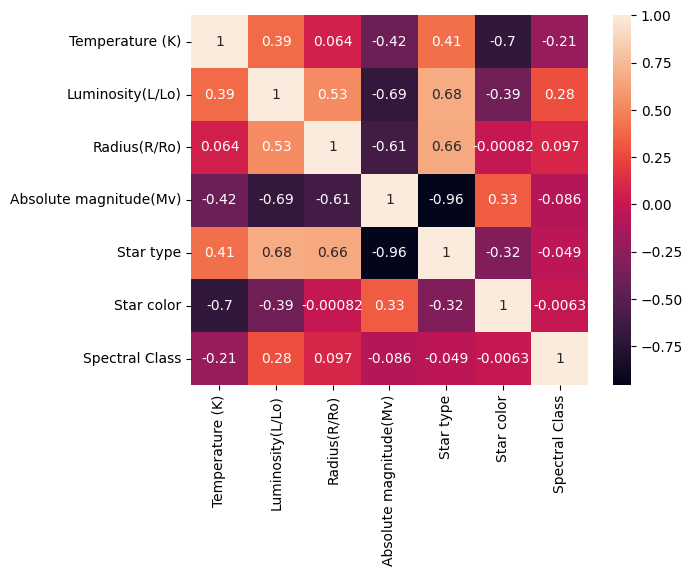

In [136]:
sns.heatmap(df_sl.corr(),annot=True)
plt.show()

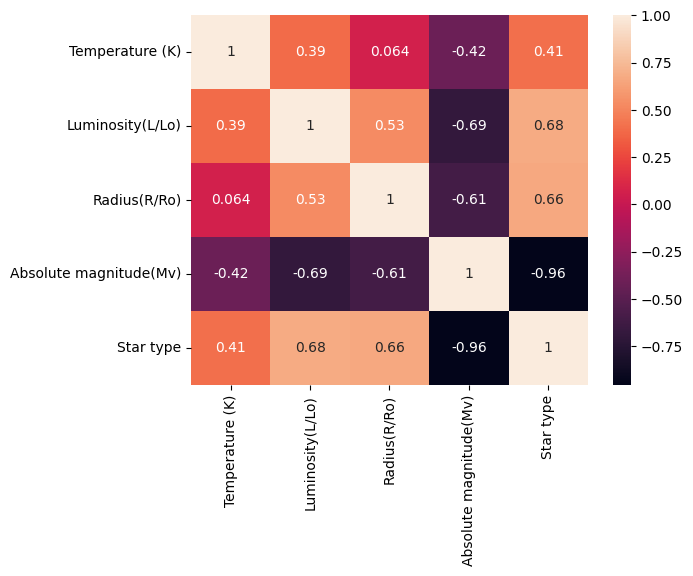

In [137]:

corr_matrix = np.corrcoef([df['Temperature (K)'], df['Luminosity(L/Lo)'], 
                           df['Radius(R/Ro)'], df['Absolute magnitude(Mv)'], df['Star type']])


sns.heatmap(corr_matrix, annot=True, 
            xticklabels=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
                         'Absolute magnitude(Mv)', 'Star type'], 
            yticklabels=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
                         'Absolute magnitude(Mv)', 'Star type'])

plt.show()

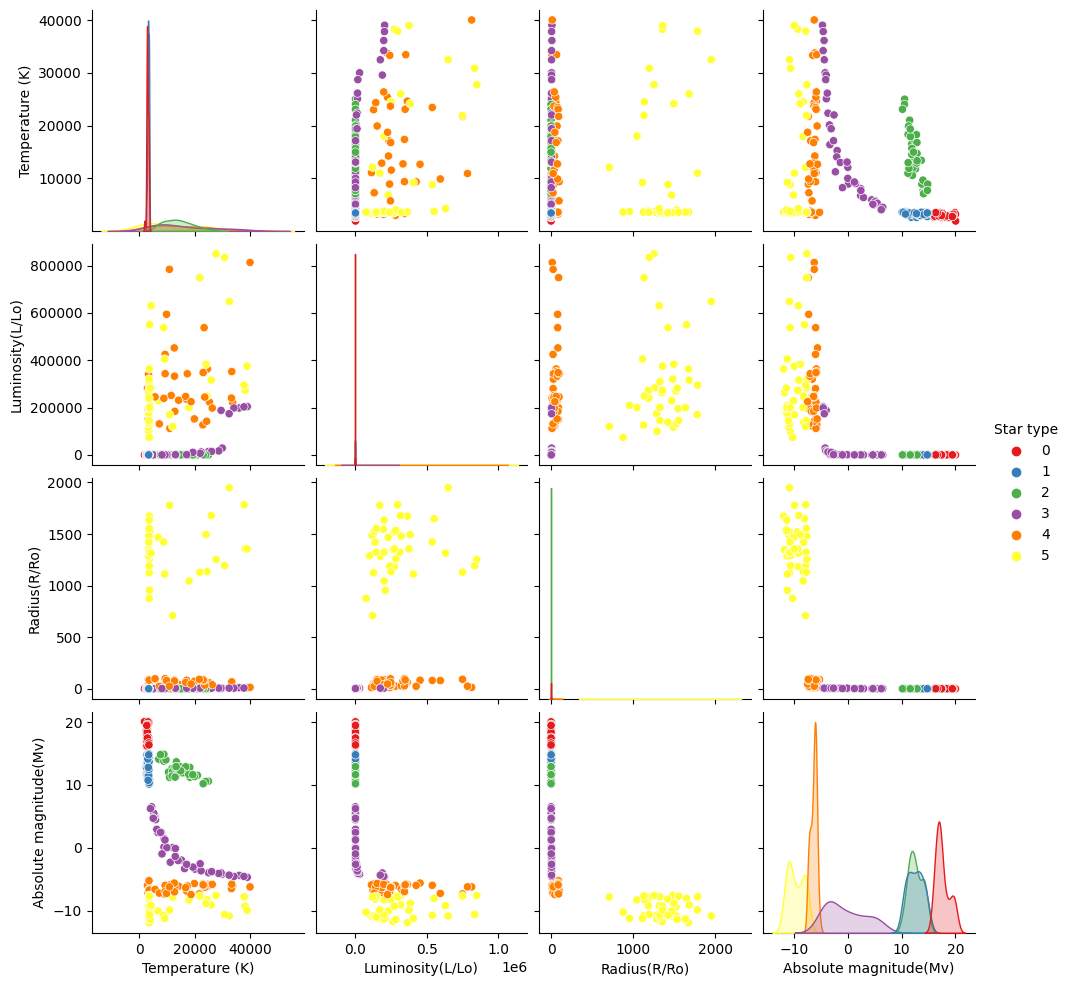

In [138]:
sns.pairplot(df,hue='Star type', palette='Set1')
plt.show()

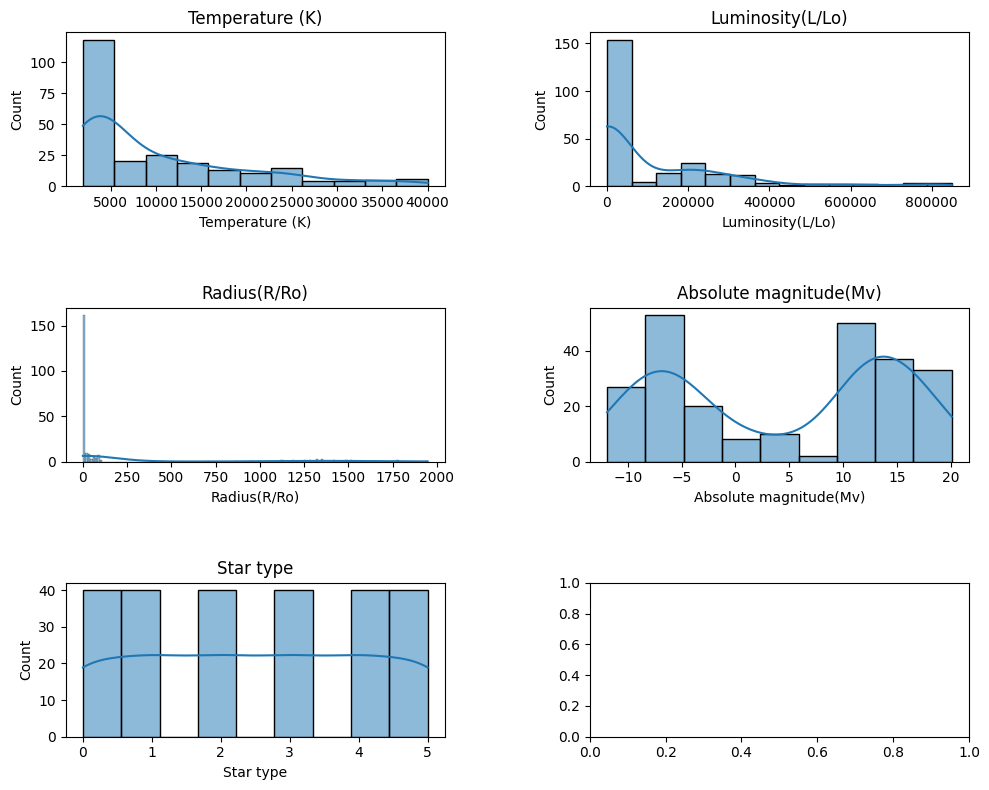

In [139]:
fig, axes = plt.subplots(3,2, figsize=(10, 8))
ax = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64'])):
    sns.histplot(df[col], ax=ax[i], kde=True) 
    ax[i].set_title(col)
    
    ax[i].ticklabel_format(style='plain', axis='both')

fig.tight_layout(w_pad=6, h_pad=4)
plt.show()

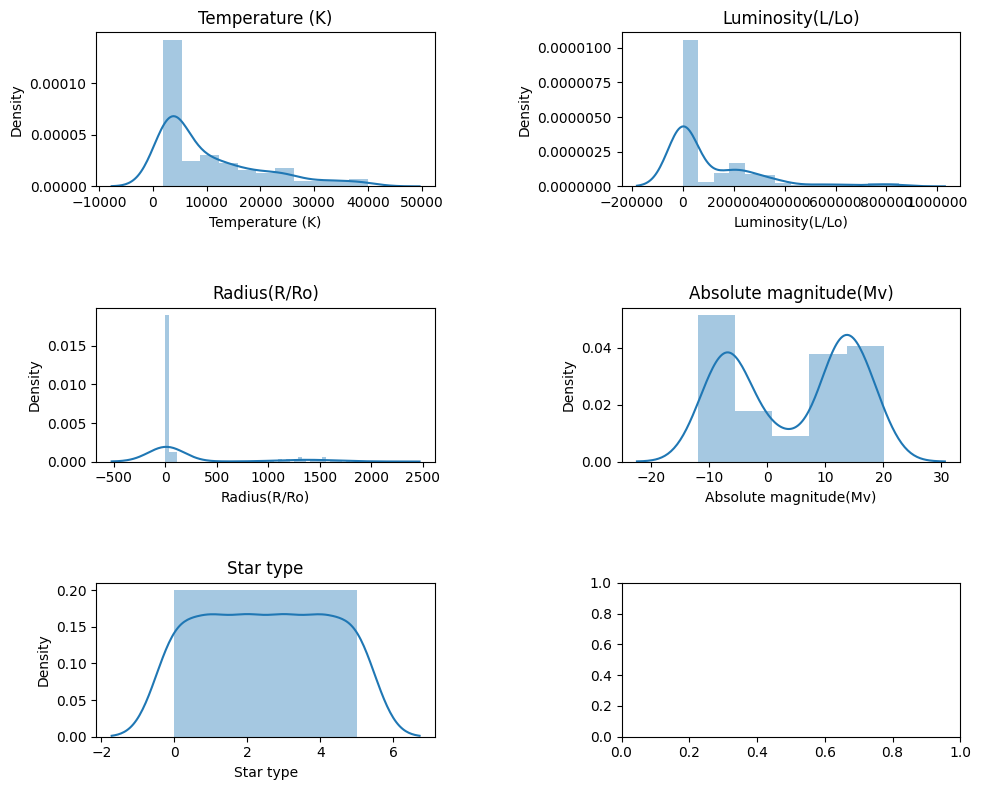

In [140]:
fig, axes = plt.subplots(3,2, figsize=(10, 8))
ax = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64'])):
    sns.distplot(df[col], ax=ax[i], kde=True)
    ax[i].set_title(col)
    
    ax[i].ticklabel_format(style='plain', axis='both')

fig.tight_layout(w_pad=6, h_pad=4)
plt.show()

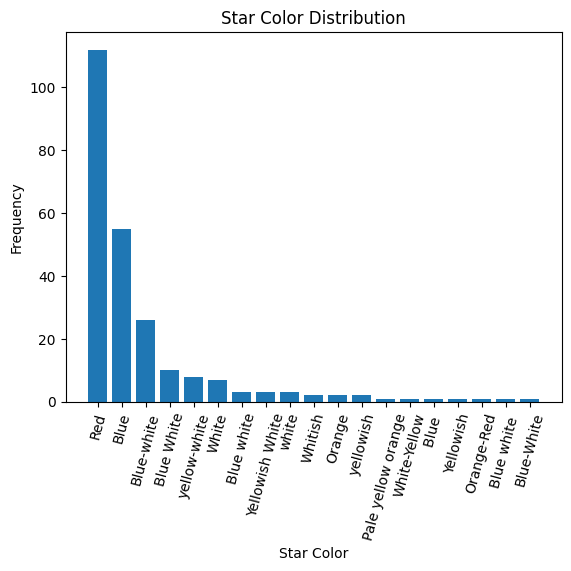

In [141]:
star_color_counts = df['Star color'].value_counts()
plt.bar(star_color_counts.index, star_color_counts.values)
plt.title('Star Color Distribution')
plt.xlabel('Star Color')
plt.ylabel('Frequency')
plt.xticks(rotation = 75)
plt.show()

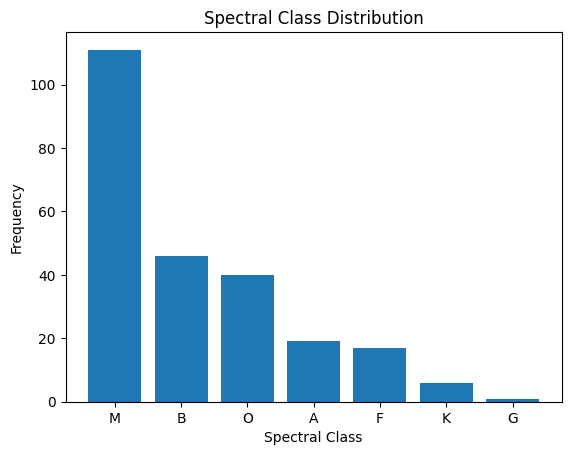

In [142]:
spectral_class_counts = df['Spectral Class'].value_counts()
plt.bar(spectral_class_counts.index, spectral_class_counts.values)
plt.title('Spectral Class Distribution')
plt.xlabel('Spectral Class')
plt.ylabel('Frequency')
plt.show()

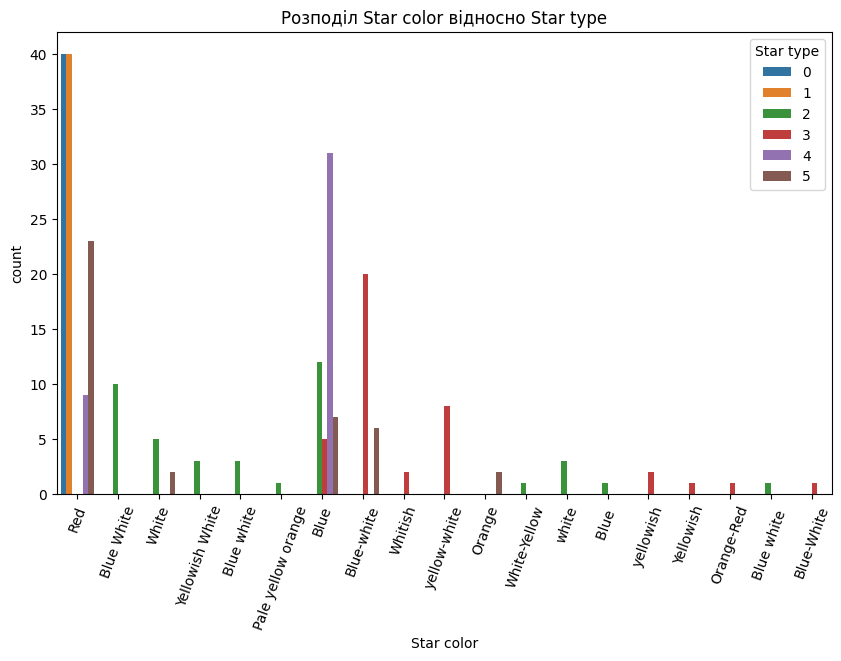

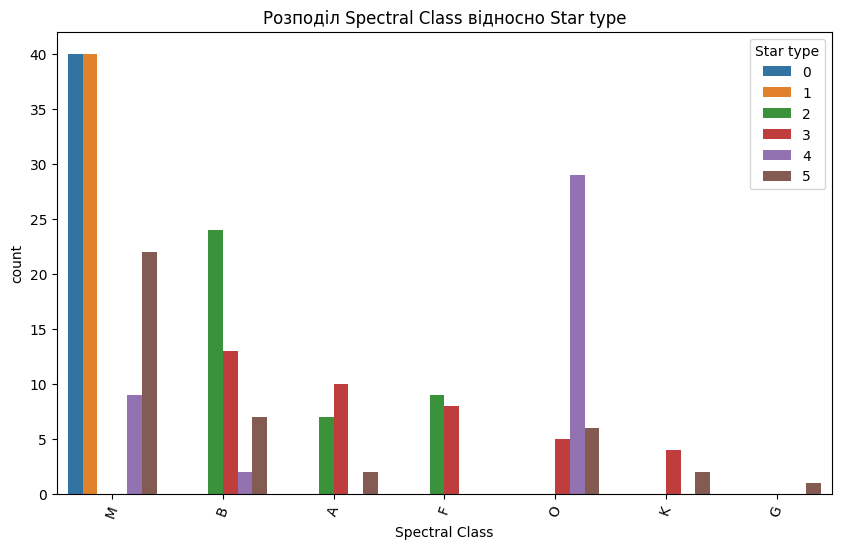

In [143]:
categorical_features = ['Star color', 'Spectral Class']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='Star type')
    plt.title(f'Розподіл {feature} відносно Star type')
    plt.xticks(rotation=70)
    plt.legend(title='Star type', loc='upper right')
    plt.show()

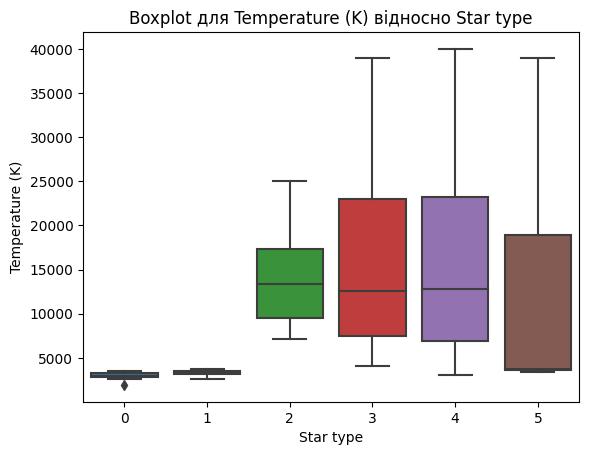

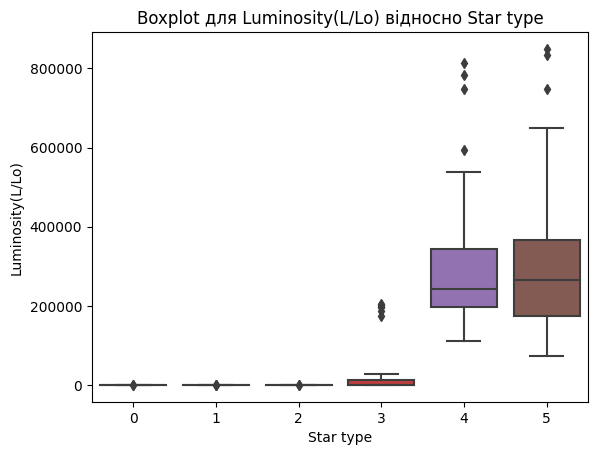

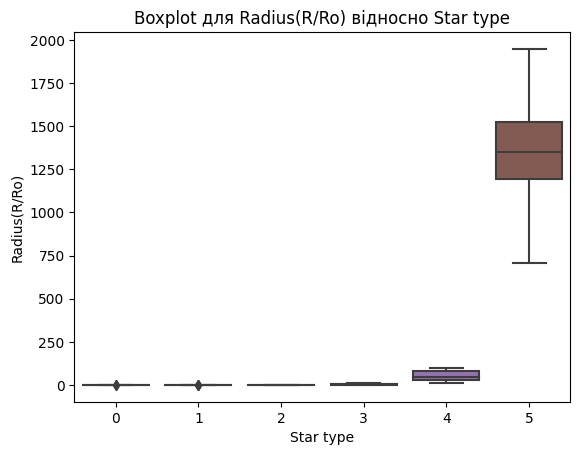

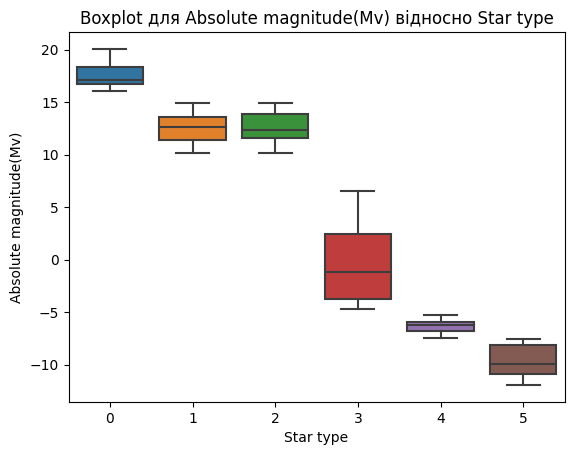

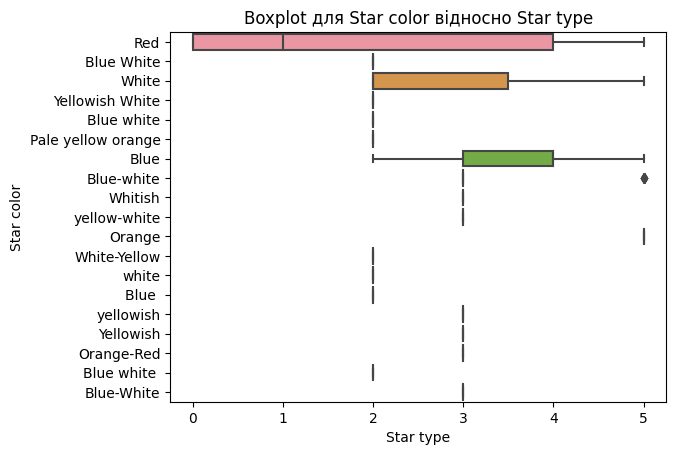

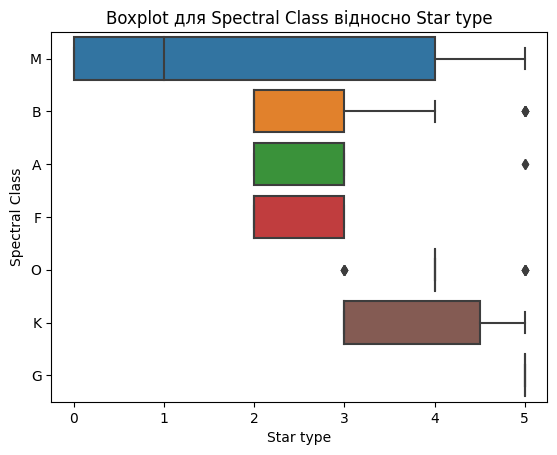

In [144]:
for feature in ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
                         'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']:
    sns.boxplot(x='Star type', y=feature, data=df)
    plt.title(f'Boxplot для {feature} відносно Star type')
    plt.show()

In [145]:
def count_outliers(data, col):
    q1 = data[col].quantile(0.25, interpolation='nearest')
    q3 = data[col].quantile(0.75, interpolation='nearest')
    IQR = q3 - q1
    LLP = q1 - 1.5 * IQR
    ULP = q3 + 1.5 * IQR

    outliers = (data[col] < LLP) | (data[col] > ULP)
    count = outliers.sum()

    return count, LLP, ULP

outlier_counts = {}
for column in df.select_dtypes(include=['int64', 'float64']):
    count, lower_limit, upper_limit = count_outliers(df, column)
    outlier_counts[column] = {
        'count': count,
        'lower_limit': lower_limit,
        'upper_limit': upper_limit
    }
    if count > 0:
        print(f"There are {count} outliers in column '{column}'")

There are 13 outliers in column 'Temperature (K)'
There are 12 outliers in column 'Luminosity(L/Lo)'
There are 40 outliers in column 'Radius(R/Ro)'


In [146]:
def remove_outliers(data, col):
    count, LLP, ULP = count_outliers(data, col)
    if count > 0:
        
        data = data[(data[col] >= LLP) & (data[col] <= ULP)]
    return data


# for column in df.select_dtypes(include=['int64', 'float64']):
#     df = remove_outliers(df, column)

In [147]:
df = pd.get_dummies(data=df,columns=["Star color","Spectral Class"],drop_first=True, dtype='int64')

In [148]:
df = df.drop('Luminosity(L/Lo)',axis=1)

In [149]:
X = df.drop("Star type",axis=1)
y = df["Star type"]

# X = np.asarray(X).astype(np.float32)

In [464]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=14)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=88)

In [465]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [466]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [467]:
model = tf.keras.models.Sequential()
model.add(Dense(256, input_shape=(27,), activation='relu'))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))  
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1)) 
model.add(Dense(6, activation='softmax'))


In [468]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 256)               7168      
                                                                 
 dense_176 (Dense)           (None, 128)               32896     
                                                                 
 dense_177 (Dense)           (None, 64)                8256      
                                                                 
 dropout_47 (Dropout)        (None, 64)                0         
                                                                 
 dense_178 (Dense)           (None, 6)                 390       
                                                                 
Total params: 48,710
Trainable params: 48,710
Non-trainable params: 0
_________________________________________________________________


In [469]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

In [470]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=25,\
#                     validation_split=0.1, callbacks=[early_stopping],\
                    verbose=1, shuffle=True)

Epoch 1/50
3/3 [==============================] - 1s 6ms/step - loss: 1.8017 - accuracy: 0.0833
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 1.7146 - accuracy: 0.2083
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 1.6408 - accuracy: 0.6111
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 1.5606 - accuracy: 0.6667
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 1.4988 - accuracy: 0.6389
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 1.4094 - accuracy: 0.6667
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 1.3114 - accuracy: 0.6528
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 1.1968 - accuracy: 0.6528
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 1.1419 - accuracy: 0.6389
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 1.0327 - accuracy: 0.6528
Epoch 11/50
3/3 [======================

In [471]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Loss:\t', test_loss)
print('Test Accuracy:\t', test_acc)

6/6 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9762
Test Loss:	 0.20754215121269226
Test Accuracy:	 0.976190447807312


Text(0.5, 1.0, 'Metrics')

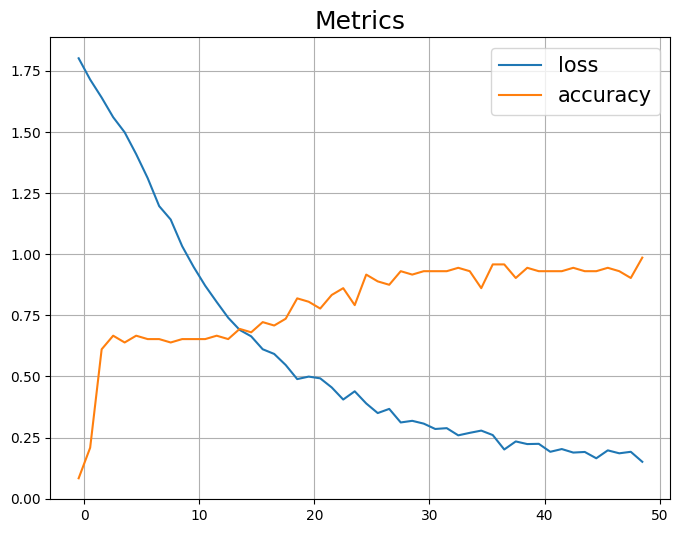

In [472]:
fig, ax = plt.subplots(figsize=(8,6))

for metric in history.history:
    if len(metric.split('_')) < 2:
        ax.plot(np.array(history.epoch)-.5, history.history[metric], label=metric)
    else:
        ax.plot(history.epoch, history.history[metric], label=metric)
    
ax.grid()


ax.legend(fontsize=15);
ax.set_title("Metrics", fontsize = 18)